This tutorial demonstrates runing Molecular Dynamics (MD) simulations on lattice systems.
First, import all the stuff we'll need

In [3]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import units
from libra_py import QE_methods
from libra_py import normal_modes

import py3Dmol   # molecular visualization
import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

In [4]:
dt = 1.0*units.fs2au
PT = {"P":31.0 }
R, V, M, E = QE_methods.read_md_data_xyz("divac1-pos-1.xyz", PT, dt)
print( V.num_of_rows, V.num_of_cols)

186 9999


In [5]:
params = {"cov_flag":0, "visualize":0, "verbosity":1 }
res = normal_modes.compute_cov1( R, V, M, E, params)

========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocities

Eigenvalue solver for covariance matrix of positions

Eigenvalue solver for covariance matrix of velocities

Angular frequencies (derived from w_v/w_r)
========= Done with the Normal modes calculations =============================


In [6]:
ndof = R.num_of_rows
dat = []
for i in range(ndof):
    dat.append(res[1].get(i))    
    print( "Mode %i   %5.0f cm^{-1}" % (i, res[1].get(i) ) )

Mode 0       0 cm^{-1}
Mode 1       0 cm^{-1}
Mode 2       0 cm^{-1}
Mode 3     161 cm^{-1}
Mode 4     167 cm^{-1}
Mode 5     167 cm^{-1}
Mode 6     171 cm^{-1}
Mode 7     166 cm^{-1}
Mode 8     168 cm^{-1}
Mode 9     170 cm^{-1}
Mode 10     175 cm^{-1}
Mode 11     173 cm^{-1}
Mode 12     166 cm^{-1}
Mode 13     164 cm^{-1}
Mode 14     168 cm^{-1}
Mode 15     161 cm^{-1}
Mode 16     165 cm^{-1}
Mode 17     159 cm^{-1}
Mode 18     163 cm^{-1}
Mode 19     164 cm^{-1}
Mode 20     165 cm^{-1}
Mode 21     165 cm^{-1}
Mode 22     159 cm^{-1}
Mode 23     157 cm^{-1}
Mode 24     155 cm^{-1}
Mode 25     158 cm^{-1}
Mode 26     159 cm^{-1}
Mode 27     153 cm^{-1}
Mode 28     154 cm^{-1}
Mode 29     154 cm^{-1}
Mode 30     156 cm^{-1}
Mode 31     145 cm^{-1}
Mode 32     148 cm^{-1}
Mode 33     144 cm^{-1}
Mode 34     147 cm^{-1}
Mode 35     148 cm^{-1}
Mode 36     144 cm^{-1}
Mode 37     139 cm^{-1}
Mode 38     135 cm^{-1}
Mode 39     133 cm^{-1}
Mode 40     135 cm^{-1}
Mode 41     130 cm^{-1}
Mo

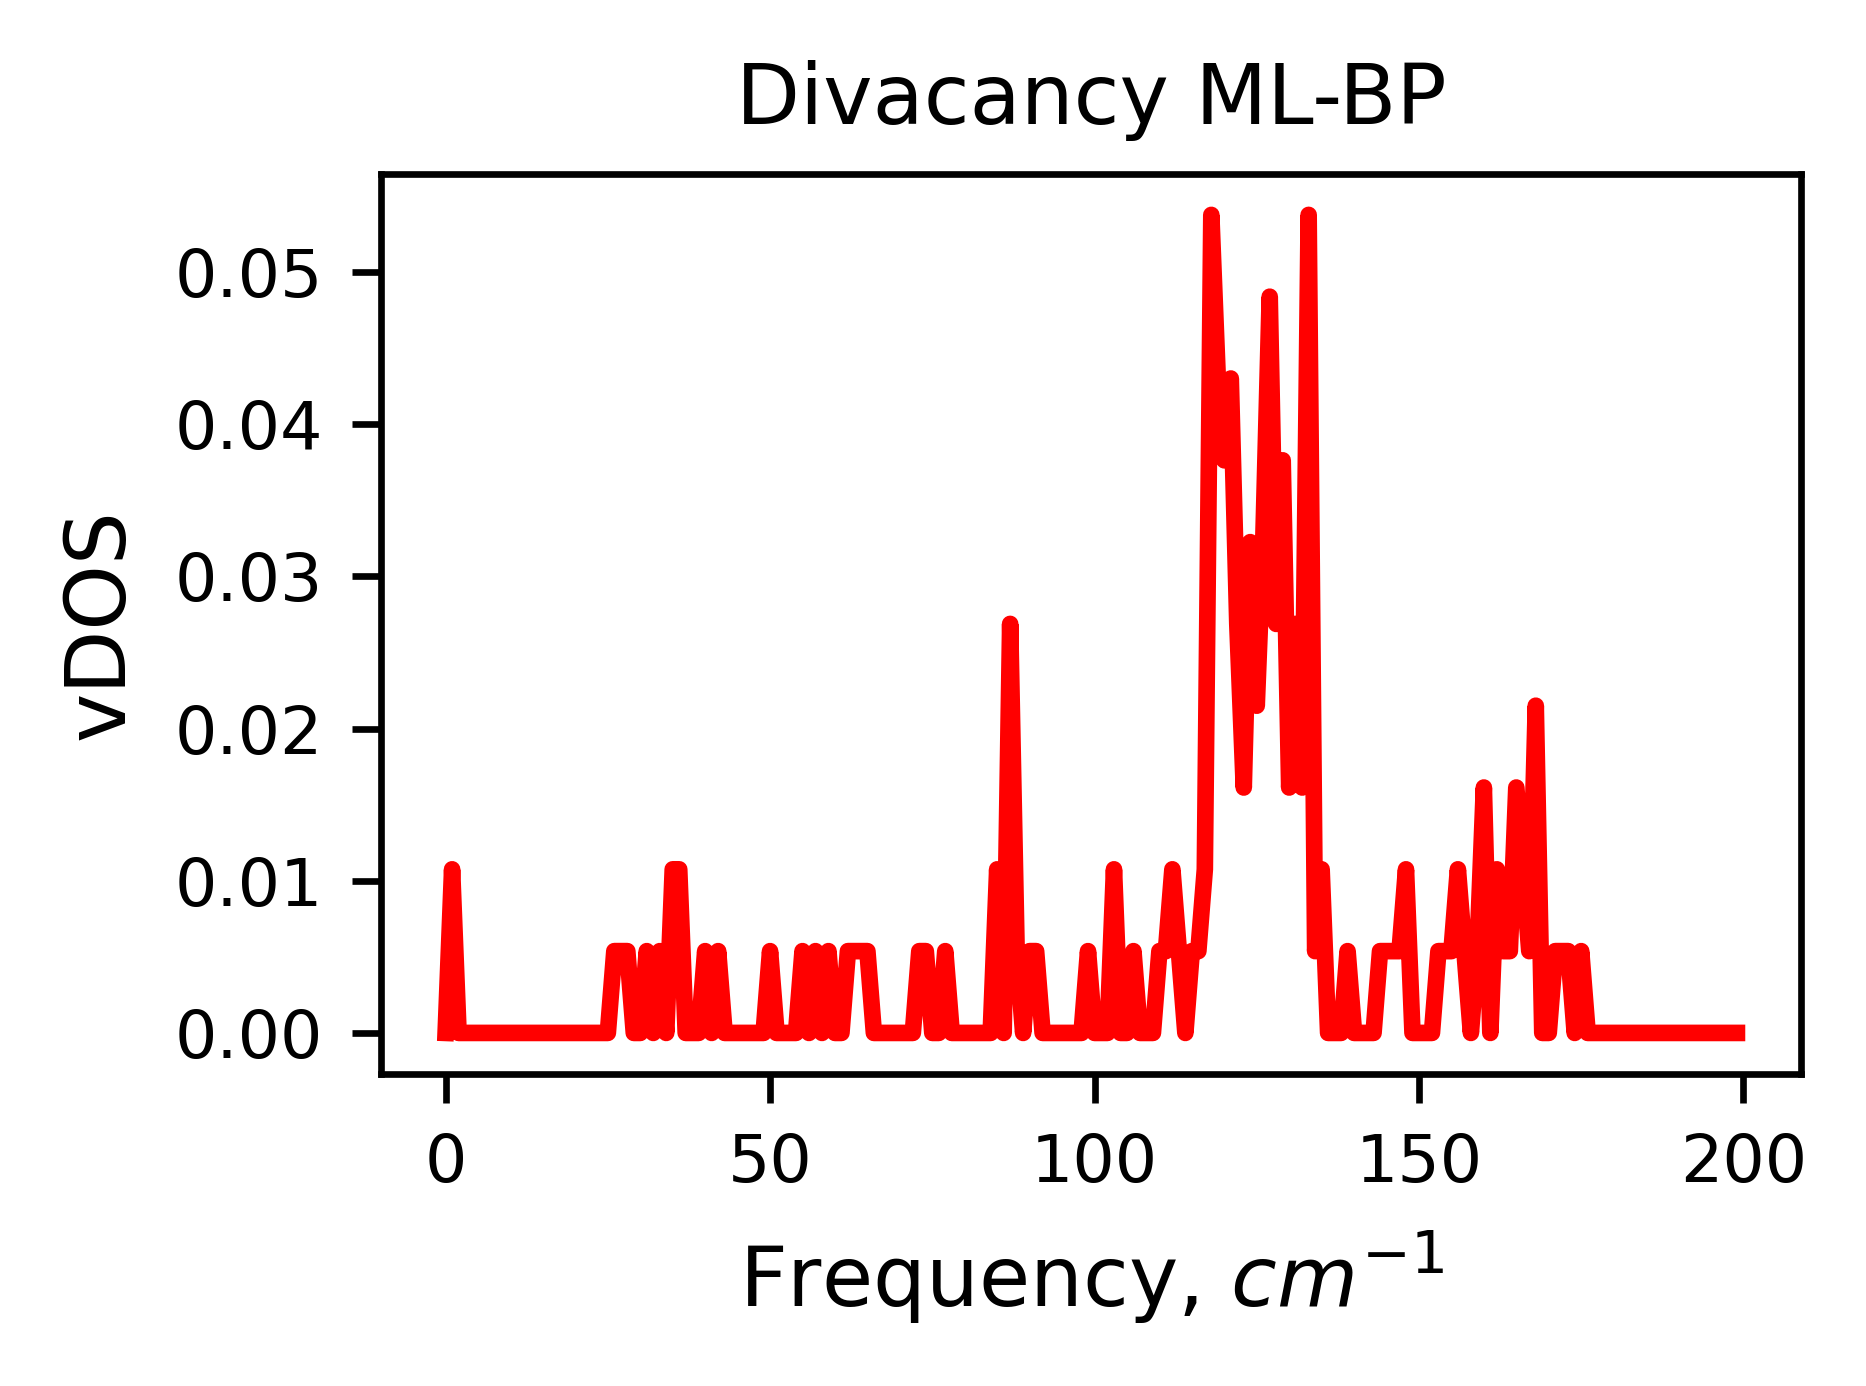

In [7]:
w = []
for i in range(200):
    w.append(1.0*i)

z = DATA(dat)
dens, cum = z.Calculate_Distribution(w)


plt.rc('axes', titlesize=12)      # fontsize of the axes title\n",
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels\n",
plt.rc('legend', fontsize=10)     # legend fontsize\n",
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)


figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
plt.subplot(1,1,1)
plt.title('Divacancy ML-BP', fontsize=10)
plt.xlabel('Frequency, $cm^{-1}$', fontsize=10)
plt.ylabel('vDOS', fontsize=10)
#plt.legend()
plt.plot(w, dens, label='', linewidth=2, color = "red") 
plt.tight_layout()
plt.savefig('vDOS.png', dpi=600)
plt.show()
plt.close()